In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [46]:
df = pd.read_csv("Copy of sonar data.csv", header=None)

In [47]:
df.shape

(208, 61)

In [48]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [49]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [50]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [51]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [52]:
x = df.drop(columns=60, axis=1)
y = df[60]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size=.1)

In [54]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(187, 60) (187,) (21, 60) (21,)


In [55]:
lr = LogisticRegression()

In [56]:
model = lr.fit(x_train, y_train)

In [57]:
model.score(x_train, y_train)

0.8235294117647058

In [58]:
model.score(x_test, y_test)

0.8571428571428571

In [59]:
pred = model.predict(x_test)

In [60]:
pred

array(['M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M'], dtype=object)

In [61]:
acc = accuracy_score(pred, y_test)

In [62]:
acc

0.8571428571428571

In [63]:
cm = confusion_matrix(y_test, pred)

<Axes: >

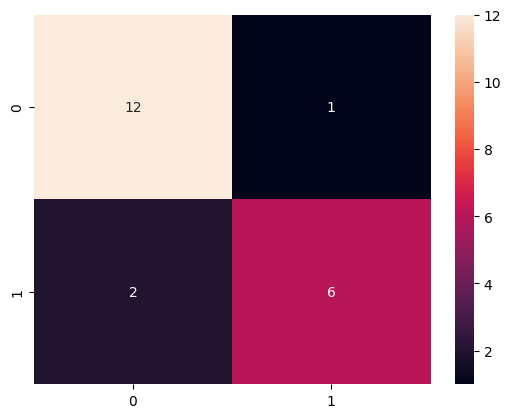

In [64]:
sns.heatmap(cm, annot= True)

In [65]:
model.predict_proba(x_test)

array([[0.71906718, 0.28093282],
       [0.20382349, 0.79617651],
       [0.45023152, 0.54976848],
       [0.18957528, 0.81042472],
       [0.69273052, 0.30726948],
       [0.50431887, 0.49568113],
       [0.54243124, 0.45756876],
       [0.51775314, 0.48224686],
       [0.14260925, 0.85739075],
       [0.72376403, 0.27623597],
       [0.88722242, 0.11277758],
       [0.45565466, 0.54434534],
       [0.42697529, 0.57302471],
       [0.97408988, 0.02591012],
       [0.74737951, 0.25262049],
       [0.83446236, 0.16553764],
       [0.78465563, 0.21534437],
       [0.56222487, 0.43777513],
       [0.60967608, 0.39032392],
       [0.36423099, 0.63576901],
       [0.78555082, 0.21444918]])

In [68]:
input = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

input_array = np.array(input).reshape(1,-1)

prediction = model.predict(input_array)

In [69]:
if(prediction[0] == "R"):
  print("The onjects is Rock")
else:
  print("The objects is mine")

The objects is mine


### Using knn

In [73]:
Knn = KNeighborsClassifier(n_neighbors=5)

In [74]:
model2 = Knn.fit(x_train, y_train)

In [75]:
pred2 = model2.predict(x_test)

In [78]:
model2.predict_proba(x_test)

array([[1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ]])

In [81]:
input = (0.0239,0.0189,0.0466,0.0440,0.0657,0.0742,0.1380,0.1099,0.1384,0.1376,0.0938,0.0259,0.1499,0.2851,0.5743,0.8278,0.8669,0.8131,0.9045,0.9046,1.0000,0.9976,0.9872,0.9761,0.9009,0.9724,0.9675,0.7633,0.4434,0.3822,0.4727,0.4007,0.3381,0.3172,0.2222,0.0733,0.2692,0.1888,0.0712,0.1062,0.0694,0.0300,0.0893,0.1459,0.1348,0.0391,0.0546,0.0469,0.0201,0.0095,0.0155,0.0091,0.0151,0.0080,0.0018,0.0078,0.0045,0.0026,0.0036,0.0024)

input_array = np.array(input).reshape(1,-1)

prediction = model.predict(input_array)

In [82]:
if(prediction[0] == "R"):
  print("The onjects is Rock")
else:
  print("The objects is mine")

The onjects is Rock
